**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing dataset**

In [2]:
dataset = pd.read_csv('/kaggle/input/apartment-rental-offers-in-germany/immo_data.csv')

In [3]:
dataset.shape

(268850, 49)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [5]:
dataset.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,...,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,...,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,...,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,...,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,...,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,...,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,...,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,...,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


**Delete columns which have more then 50% null values**

In [6]:
dataset.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln',
       'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'],
      dtype='object')

In [7]:
dataset.columns[(dataset.isna().sum()/len(dataset)) > 0.50]

Index(['telekomHybridUploadSpeed', 'noParkSpaces', 'heatingCosts',
       'energyEfficiencyClass', 'lastRefurbish', 'electricityBasePrice',
       'electricityKwhPrice'],
      dtype='object')

In [8]:
dataset = dataset.drop(columns = dataset.columns[(dataset.isna().sum()/len(dataset)) > 0.50])

In [9]:
dataset.shape

(268850, 42)

**Delete columns which are not relevant for analysis**

In [10]:
dataset = dataset.drop(columns = ['telekomTvOffer','newlyConst','picturecount','pricetrend','telekomUploadSpeed','scoutId','firingTypes','geo_bln','cellar','yearConstructedRange','houseNumber','geo_krs','condition','interiorQual','street','streetPlain','baseRentRange','geo_plz','thermalChar','noRoomsRange','livingSpaceRange','regio2','description','facilities','date'])

In [11]:
dataset.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'balcony', 'totalRent',
       'yearConstructed', 'hasKitchen', 'baseRent', 'livingSpace',
       'petsAllowed', 'lift', 'typeOfFlat', 'noRooms', 'floor',
       'numberOfFloors', 'garden', 'regio3'],
      dtype='object')

**Fill numeric data by mean**

In [12]:
dataset._get_numeric_data().mean()

serviceCharge       151.206113
balcony               0.616455
totalRent           901.331522
yearConstructed    1966.400590
hasKitchen            0.342407
baseRent            694.129432
livingSpace          74.355548
lift                  0.235529
noRooms               2.641261
floor                 2.122405
numberOfFloors        3.572319
garden                0.196232
dtype: float64

In [13]:
dataset.fillna(dataset._get_numeric_data().mean(), inplace=True)

In [14]:
dataset.isna().sum()

regio1                  0
serviceCharge           0
heatingType         44856
balcony                 0
totalRent               0
yearConstructed         0
hasKitchen              0
baseRent                0
livingSpace             0
petsAllowed        114573
lift                    0
typeOfFlat          36614
noRooms                 0
floor                   0
numberOfFloors          0
garden                  0
regio3                  0
dtype: int64

**Fill na categorical data**

In [15]:
for cols in dataset.columns:
    if dataset[cols].dtype == 'object' or dataset[cols].dtype == 'bool':
        print('columns: ', cols)
        print(dataset[cols].value_counts().head(1))
        

columns:  regio1
Nordrhein_Westfalen    62863
Name: regio1, dtype: int64
columns:  heatingType
central_heating    128977
Name: heatingType, dtype: int64
columns:  balcony
True    165734
Name: balcony, dtype: int64
columns:  hasKitchen
False    176794
Name: hasKitchen, dtype: int64
columns:  petsAllowed
negotiable    91970
Name: petsAllowed, dtype: int64
columns:  lift
False    205528
Name: lift, dtype: int64
columns:  typeOfFlat
apartment    131522
Name: typeOfFlat, dtype: int64
columns:  garden
False    216093
Name: garden, dtype: int64
columns:  regio3
Innenstadt    4751
Name: regio3, dtype: int64


In [16]:
for cols in dataset.columns:
    if dataset[cols].dtype == 'object' or dataset[cols].dtype == 'bool':
        print(dataset[cols].value_counts().head(1).index[0])

Nordrhein_Westfalen
central_heating
True
False
negotiable
False
apartment
False
Innenstadt


In [17]:
for cols in dataset.columns:
    if dataset[cols].dtype == 'object' or dataset[cols].dtype == 'bool':
        dataset[cols].fillna(dataset[cols].value_counts().head(1).index[0], inplace=True)

In [18]:
print(dataset.isna().sum()/len(dataset))

regio1             0.0
serviceCharge      0.0
heatingType        0.0
balcony            0.0
totalRent          0.0
yearConstructed    0.0
hasKitchen         0.0
baseRent           0.0
livingSpace        0.0
petsAllowed        0.0
lift               0.0
typeOfFlat         0.0
noRooms            0.0
floor              0.0
numberOfFloors     0.0
garden             0.0
regio3             0.0
dtype: float64


**Deleting Outliers**

In [19]:
dataset.shape

(268850, 17)

In [20]:
for cols in dataset.columns:
    if dataset[cols].dtype == 'int64' or dataset[cols].dtype == 'float64':
        upper_range = dataset[cols].mean() + 3 * dataset[cols].std()
        lower_range = dataset[cols].mean() - 3 * dataset[cols].std()
        
        indexes = dataset[(dataset[cols] > upper_range)|(dataset[cols] < lower_range)].index
        dataset = dataset.drop(indexes)    

In [21]:
dataset.shape

(266649, 17)

**Renaming Columns**

In [22]:
dataset = dataset.rename(columns = {'regio1':'state','regio3':'city/town'})

In [23]:
dataset.columns

Index(['state', 'serviceCharge', 'heatingType', 'balcony', 'totalRent',
       'yearConstructed', 'hasKitchen', 'baseRent', 'livingSpace',
       'petsAllowed', 'lift', 'typeOfFlat', 'noRooms', 'floor',
       'numberOfFloors', 'garden', 'city/town'],
      dtype='object')

**Data only for Berlin**

In [24]:
df_berlin = dataset[dataset['state'] == 'Berlin'].reset_index(drop = True)

In [25]:
df_berlin.shape

(10278, 17)

In [26]:
df_berlin.head()

,state,serviceCharge,heatingType,balcony,totalRent,yearConstructed,hasKitchen,baseRent,livingSpace,petsAllowed,lift,typeOfFlat,noRooms,floor,numberOfFloors,garden,city/town
0,Berlin,320.00,central_heating,True,1140.00,1966.40059,True,820.00,77.00,negotiable,True,ground_floor,3.0,0.0,3.0,False,Staaken_Spandau
1,Berlin,79.00,central_heating,False,955.00,1918.00000,False,808.00,62.63,negotiable,False,ground_floor,2.0,0.0,3.0,False,Weißensee_Weißensee
2,Berlin,150.00,floor_heating,True,1300.00,2019.00000,True,1150.00,46.40,no,True,apartment,2.0,3.0,5.0,False,Mitte_Mitte
3,Berlin,228.78,floor_heating,True,1428.78,2017.00000,True,1200.00,67.00,negotiable,True,apartment,2.5,6.0,7.0,False,Kreuzberg_Kreuzberg
4,Berlin,147.08,district_heating,True,1559.05,2019.00000,True,1338.43,73.54,negotiable,True,ground_floor,2.0,0.0,6.0,False,Tiergarten_Tiergarten


**Replacing values of true and false with 1 and 0**

In [27]:
cols = ['balcony','hasKitchen','lift','garden']
df_berlin[cols] = df_berlin[cols].replace({True:1,False:0})

In [28]:
df_berlin.tail()

,state,serviceCharge,heatingType,balcony,totalRent,yearConstructed,hasKitchen,baseRent,livingSpace,petsAllowed,lift,typeOfFlat,noRooms,floor,numberOfFloors,garden,city/town
10273,Berlin,155.00,central_heating,0,630.00,1996.0,0,475.00,57.00,no,0,roof_storey,1.0,2.122405,3.000000,0,Friedrichshagen_Köpenick
10274,Berlin,100.00,self_contained_central_heating,0,850.00,1910.0,1,750.00,59.82,negotiable,0,apartment,2.0,3.000000,5.000000,0,Spandau_Spandau
10275,Berlin,200.00,district_heating,1,949.00,1967.0,0,619.00,95.00,negotiable,1,apartment,3.5,2.000000,3.572319,0,Waidmannslust_Reinickendorf
10276,Berlin,100.00,district_heating,0,919.00,2019.0,1,819.00,28.45,negotiable,1,apartment,1.0,2.000000,6.000000,1,Charlottenburg_Charlottenburg
10277,Berlin,250.94,district_heating,1,828.77,1972.0,0,577.83,72.64,negotiable,1,apartment,3.0,4.000000,3.572319,0,Spandau_Spandau


**Finding Correlation between different columns**

<function matplotlib.pyplot.show(close=None, block=None)>

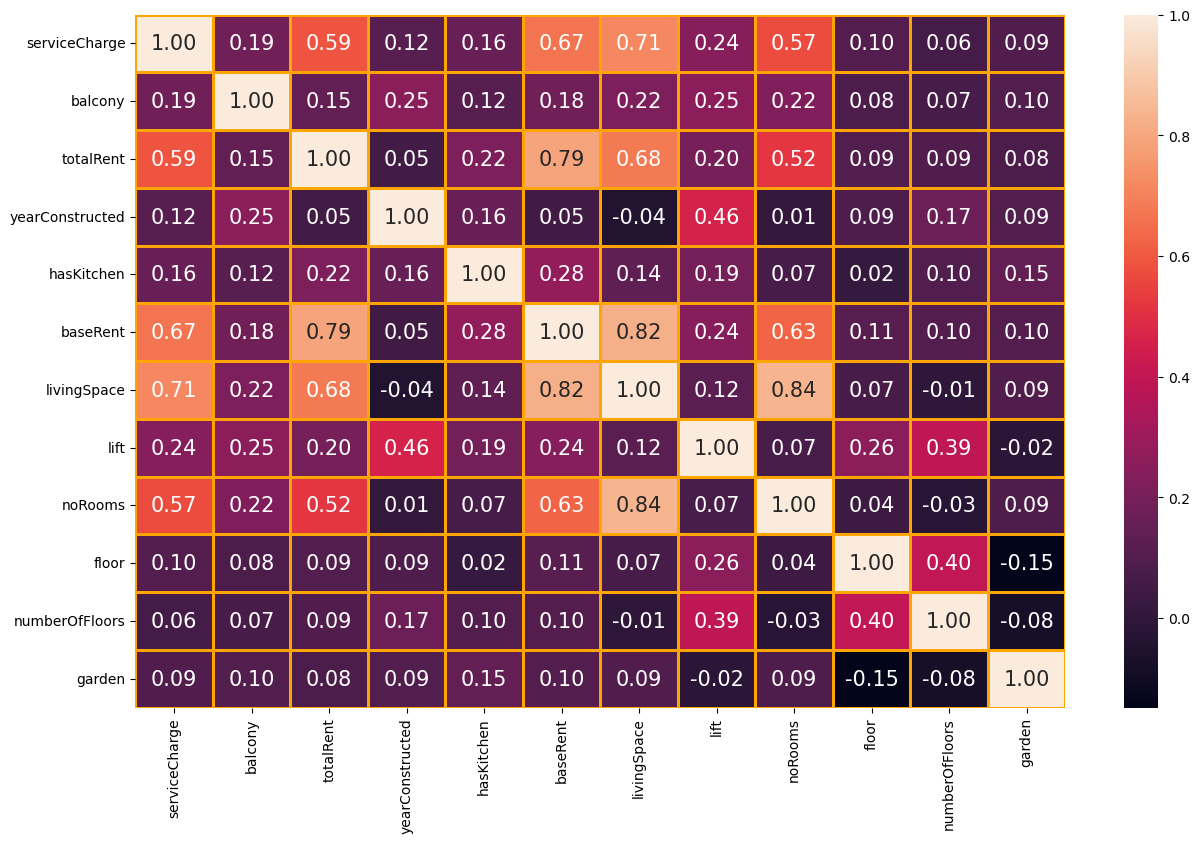

In [29]:
plt.figure(figsize = (15,9))
sns.heatmap(df_berlin.corr(),annot = True, fmt = '0.2f', annot_kws = {'size':15}, linewidth = 2, linecolor = 'orange')
plt.show

There is a strong correlation between total rent and living space.

**Total Rent on the basis of city/town**

Text(0, 0.5, 'Total Rent')

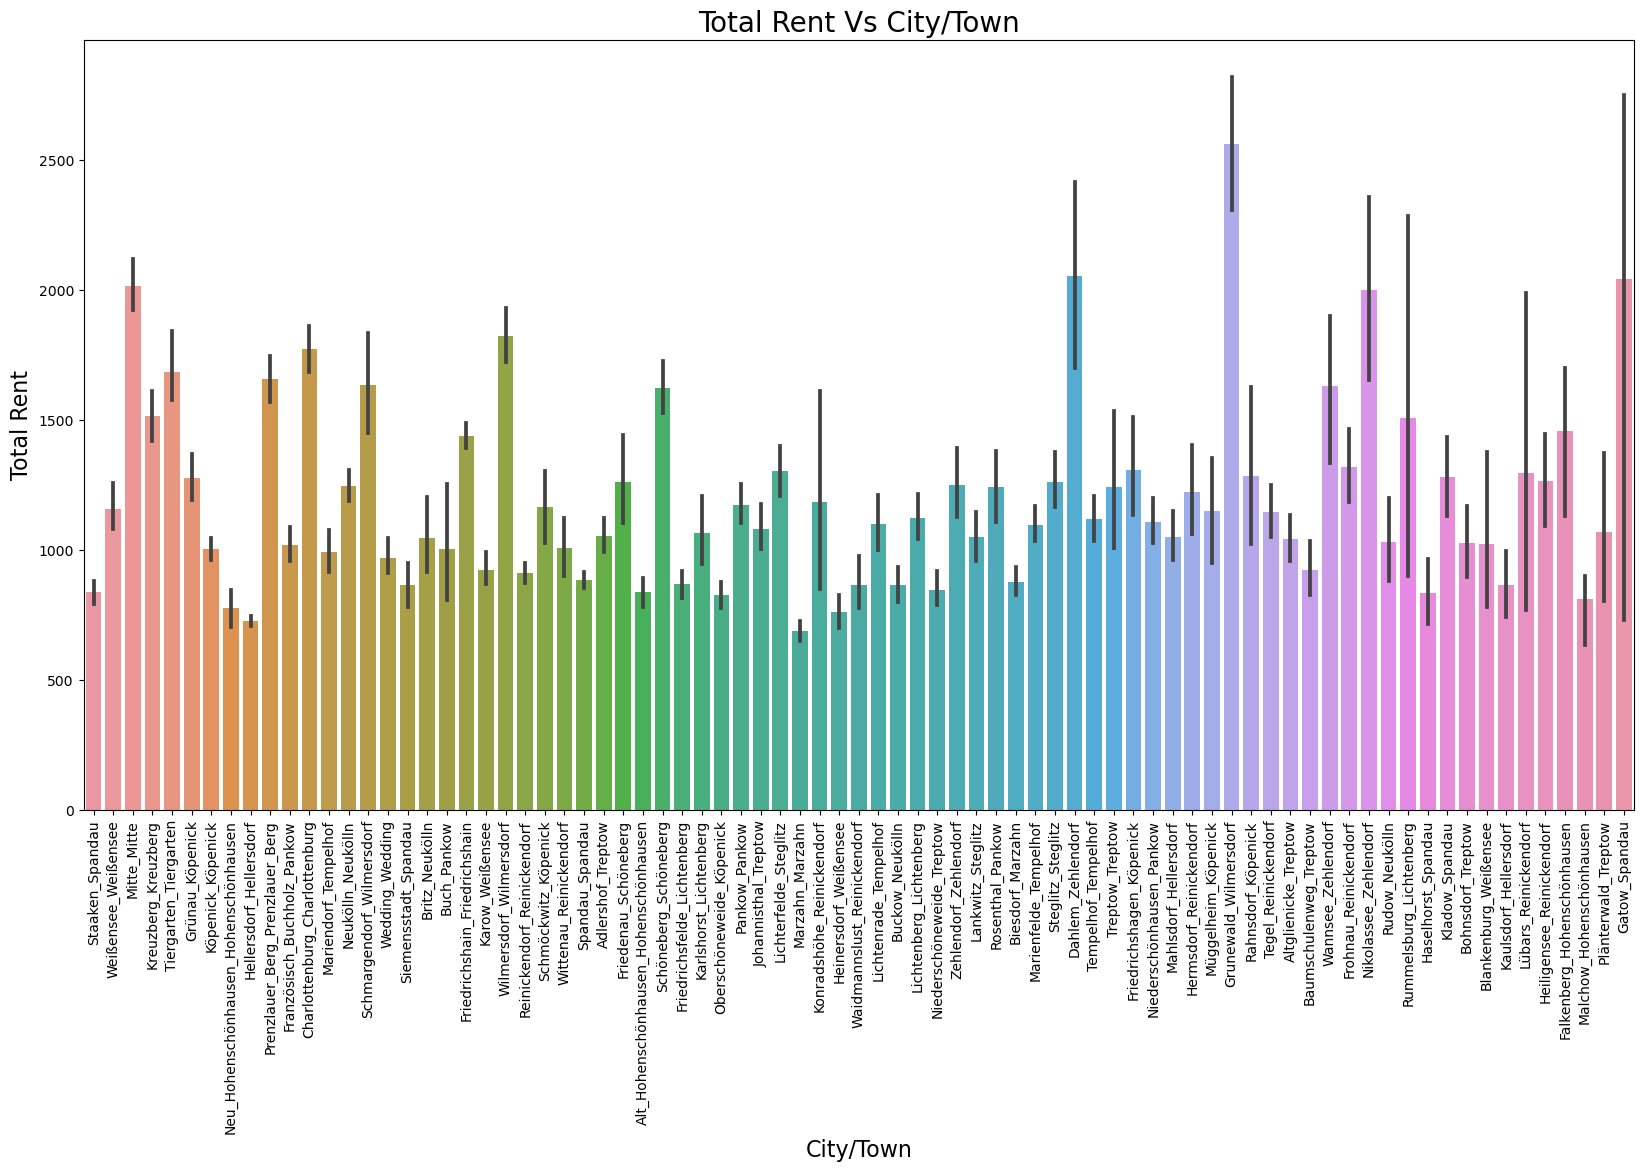

In [30]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'city/town', y = 'totalRent', data = df_berlin)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Total Rent Vs City/Town', fontsize = 20)
plt.xlabel('City/Town', fontsize = 16)
plt.ylabel('Total Rent', fontsize = 16)

* From the above graph it is concluded that the cities 'Grunewald Wilmersdorf','Mitte','Dahlem Zehlendorf','Nikolassee Zehlendorf','Gatow Spandau' has the highest rent apartments.
* The cities which has lowest rent apartments are 'Marzahn' and 'Hellersdorf'.
* Some more cities with lower rents are 'Staaken Spandau','Hohenschonhausen','Siemensstadt Spandau','Heinersdorf','Haselhorsf','Malchow'

**Effect of year constructed on total rent**

In [31]:
df_berlin['yearConstructed'].value_counts()


1966.40059    1421
2019.00000     968
1900.00000     803
2018.00000     656
1910.00000     312
              ... 
1863.00000       1
1867.00000       1
1857.00000       1
1884.00000       1
1876.00000       1
Name: yearConstructed, Length: 155, dtype: int64

Most of the apartments are made in the year 1966.

Text(0, 0.5, 'Total Rent')

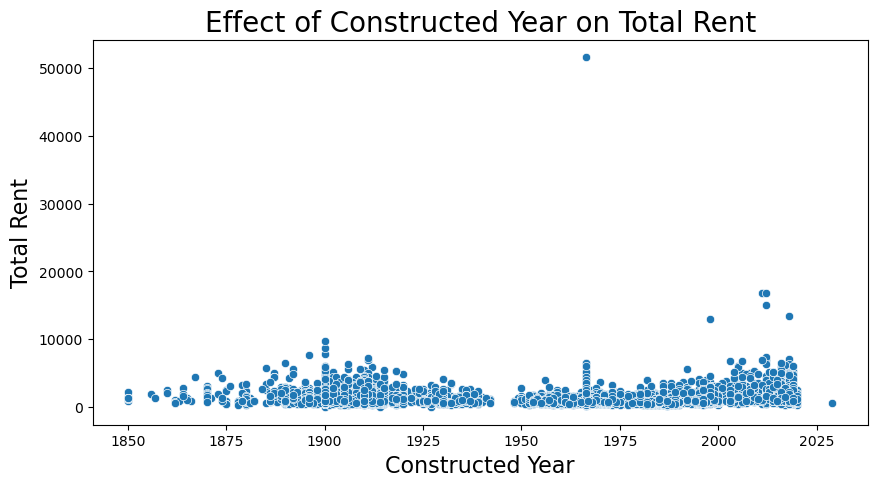

In [32]:
plt.figure(figsize = (10,5))
ax = sns.scatterplot(x = 'yearConstructed', y = 'totalRent', data = df_berlin)
plt.title('Effect of Constructed Year on Total Rent',fontsize=20)
plt.xlabel('Constructed Year',fontsize=16)
plt.ylabel('Total Rent',fontsize=16)

* Apartments which are made in 1900 and 1965 are of higher rents.
* Rent of very old apartment(1850 - 1900) is low. 
* Newly made apartments from year 2000 are of high rent.
* Old apartments which are made in year from 1900-1920 are also have high rent.

There are different types of flat like 'maisonette', 'loft', 'terraced flat' etc. the rent for each type of flat is different. Below graph shows the base rent for these different types of flat.

Text(0, 0.5, 'Base Rent')

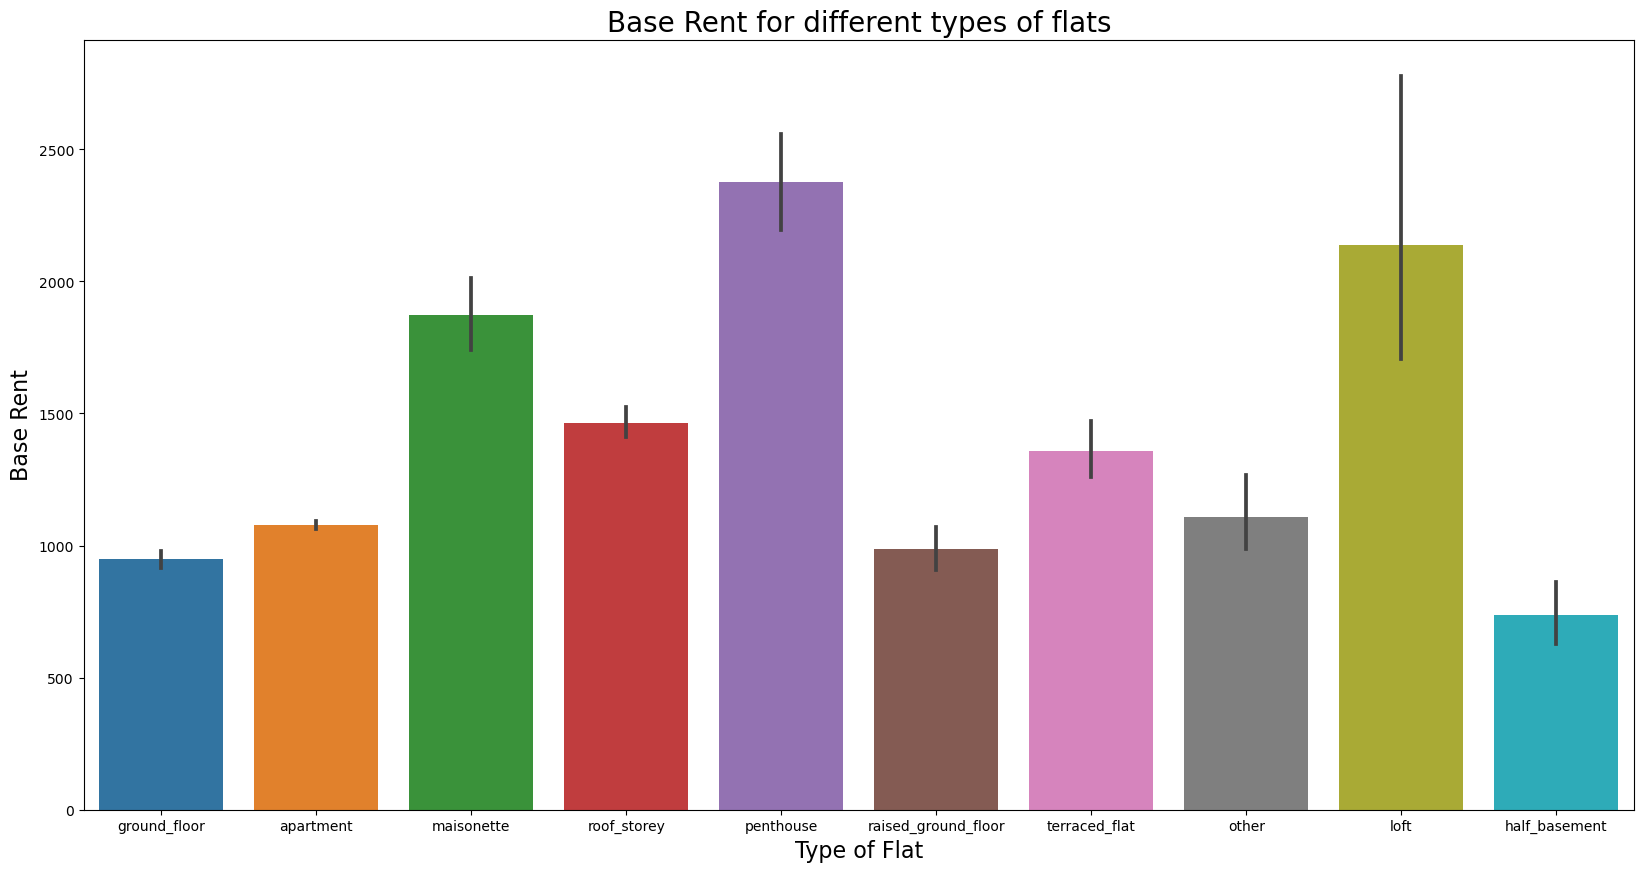

In [33]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'typeOfFlat', y = 'baseRent', data = df_berlin)
plt.title('Base Rent for different types of flats',fontsize = 20)
plt.xlabel('Type of Flat',fontsize = 16)
plt.ylabel('Base Rent', fontsize = 16)

* The most expensive flats are 'pent house','loft' and 'maisonette'.
* The flats with low rent are 'half basement','ground floor' and 'raised ground floor'.
* 'roof storey' and 'terraced flat' have rents above average.

There are other factors due to which the rent of flat increases. These include balcony, kitchen, garden and lift. Below diagram shows the pie chart of the base rent with these factors. 

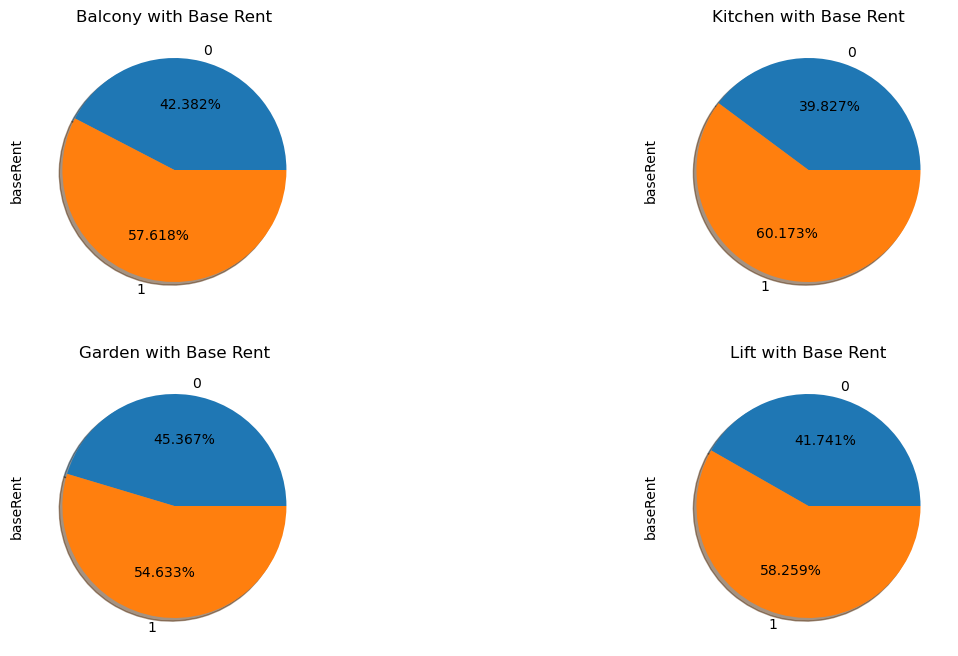

In [34]:
fig = plt.figure(figsize = (15,8))

ax1 = fig.add_subplot(221)
df_berlin.groupby('balcony')['baseRent'].mean().plot.pie(autopct = '%1.3f%%', shadow = True)

ax2 = fig.add_subplot(222)
df_berlin.groupby('hasKitchen')['baseRent'].mean().plot.pie(autopct = '%1.3f%%', shadow = True)

ax3 = fig.add_subplot(223)
df_berlin.groupby('garden')['baseRent'].mean().plot.pie(autopct = '%1.3f%%', shadow = True)

ax4 = fig.add_subplot(224)
df_berlin.groupby('lift')['baseRent'].mean().plot.pie(autopct = '%1.3f%%', shadow = True)

ax1.title.set_text('Balcony with Base Rent')
ax2.title.set_text('Kitchen with Base Rent')
ax3.title.set_text('Garden with Base Rent')
ax4.title.set_text('Lift with Base Rent')


* From the above pie charts it is clearly seen that the presence of facilities (balcony, kitchen, lift and garden) would increases the rent and the base rent for kitchen is more then others.

In different flats, there are different types of heatings. These types of heating also increases or decreases the rent. The graph below shows the service charges for each type of heating.

Text(0, 0.5, 'Service Charge')

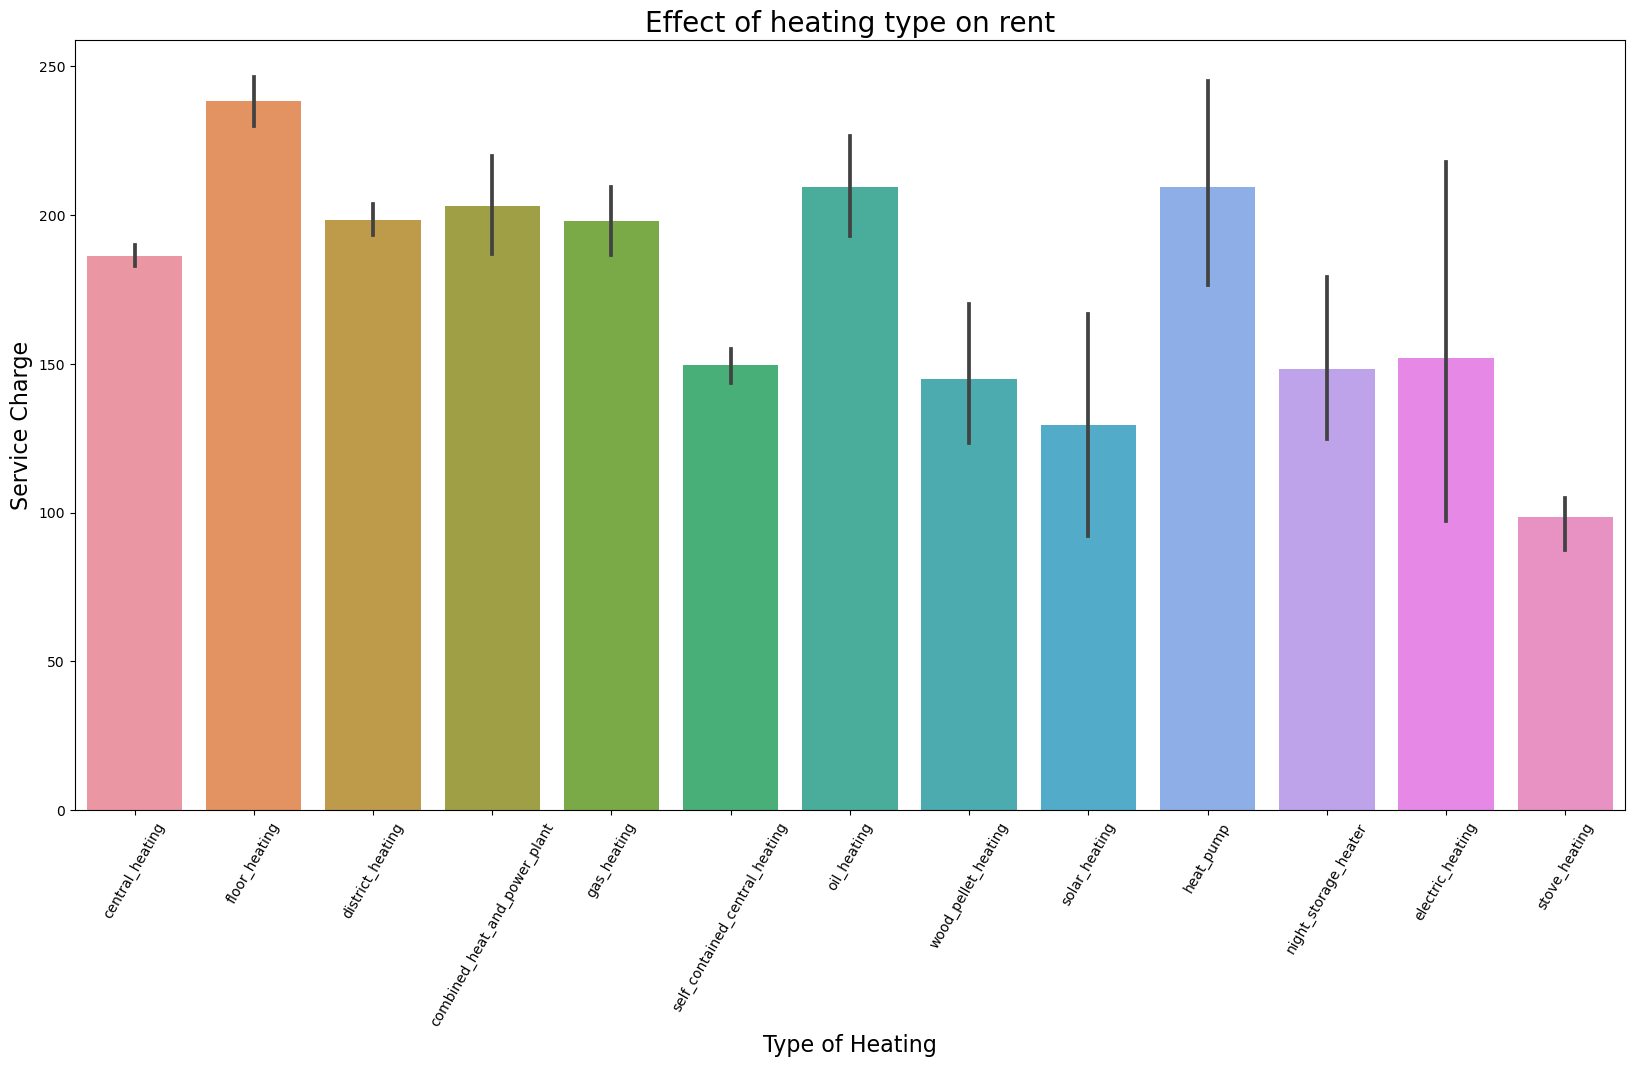

In [35]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'heatingType', y = 'serviceCharge', data = df_berlin)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
plt.title('Effect of heating type on rent', fontsize = 20)
plt.xlabel('Type of Heating', fontsize = 16)
plt.ylabel('Service Charge', fontsize = 16)

* From the above graph it is concluded that the most expensive heating is the floor heating and the most cheaper heating is the stove heating.
* Furthermore, district heating, combined heat, gas heating and heat pump are also costy.

There is also extra charges for pets.
The graph below shows total rent of the flats in which the pets allowed, not allowed and negotiable.

Text(0, 0.5, 'Total Rent')

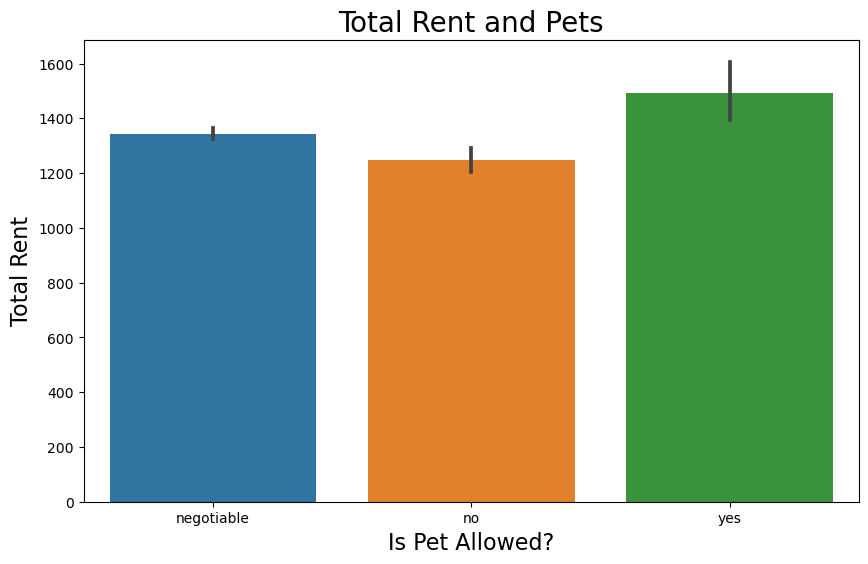

In [36]:
plt.figure(figsize = (10,6))
ax = sns.barplot(x = 'petsAllowed', y = 'totalRent', data = df_berlin)
plt.title('Total Rent and Pets', fontsize = 20)
plt.xlabel('Is Pet Allowed?', fontsize = 16)
plt.ylabel('Total Rent', fontsize = 16)

* It is clearly seen that the total rent of flat is more in which the pets are allowed as compared to that in which the pets are not allowed or negotiable.

**Building a Multiple Linear Regression model**

In [37]:
X = df_berlin.drop(columns = ['state','heatingType','balcony','totalRent','hasKitchen','yearConstructed','baseRent','petsAllowed','lift','typeOfFlat','garden','city/town'])

In [38]:
X.head()

,serviceCharge,livingSpace,noRooms,floor,numberOfFloors
0,320.00,77.00,3.0,0.0,3.0
1,79.00,62.63,2.0,0.0,3.0
2,150.00,46.40,2.0,3.0,5.0
3,228.78,67.00,2.5,6.0,7.0
4,147.08,73.54,2.0,0.0,6.0


In [39]:
Y = df_berlin['totalRent']

In [40]:
Y.head()

0    1140.00
1     955.00
2    1300.00
3    1428.78
4    1559.05
Name: totalRent, dtype: float64

**Splitting the data into train and test set**

In [41]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [42]:
print('train X: ',train_X.shape)
print('test X: ',test_X.shape)
print('train Y: ',train_Y.shape)
print('test Y: ',test_Y.shape)

train X:  (7194, 5)
test X:  (3084, 5)
train Y:  (7194,)
test Y:  (3084,)


Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

**Train the machine learning model on training set**

In [44]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train_X,train_Y)

LinearRegression()

In [45]:
regressor.intercept_

1334.0047912998539

In [46]:
regressor.coef_

array([ 205.25382807,  650.49282252, -146.0460308 ,    8.55119832,
         74.06941921])

**Regression Equation**

Total Rent = 1334 + 205.25(serviceCharge) + 650.49(livingSpace) - 146.04(noRooms) +     8.55(floor) + 74.06(noOfFloor)

**Prediction of test data**

In [47]:
y_predict = regressor.predict(test_X)
df = pd.DataFrame({'Actual':test_Y, 'Predicted':y_predict})
df

,Actual,Predicted
6909,890.00,859.219914
6155,1890.00,2315.723478
334,1700.00,1441.904078
5981,3664.25,2898.892926
3184,1090.00,725.372330
...,...,...
585,3593.17,3180.730495
3553,565.40,709.906284
2481,1580.00,1176.022278
1045,1259.00,1546.676881


**Calculating R square value for the model**

In [48]:
from sklearn.metrics import r2_score
r2_score(test_Y, y_predict)

0.6905523071710322

* As R square value for the model comes out 0.69 which means that our model is 69% accurate in predicting the values of total rent.
* In other words, 69% variations in the total rent are explained by serviceCharge, livingSpace, noRooms, floor and noOfFloor.